# Geodatenanalyse 1

## Übung 5: Multivariate Statistik - Lösung

In dieser Übung wollen wir uns mit der Analyse und Visualisierung von mehrdimensionalen Daten befassen. Dazu lesen wir zunächst den vollständigen Datensatz (Data_GW_KA.csv) mit den Grundwasserparametern aus Karlsruhe in Python ein. 

In [64]:
# [1]
import pandas as pd  # pandas package einladen und mit der Abkürzung 'pd' versehen
data = pd.read_csv('Data_GW_KA.csv', sep=';', encoding='cp1252') # 

# data = data.drop(columns="Pegel") # bei Einlesen über pd.read_excel()  

### In 5 Schritten zur Hauptkomponentenanalyse

#### 1. Standardisierung

Da wir bereits gesehen haben, dass die Varianzen und Kovarianzen der Parameter in dem Datensatz unterschiedliche Größenordnungen haben, sollten die Werte sämtlicher Parameter vor der weiteren Analyse auf eine Standard-Normalvereilung transformiert werden. 

Dazu gibt es in dem Python Package `sklearn` die Funktion `sklearn.preprocessing.StandardScaler().fit_transform()`. Ladet diese Funktion zunächst in Euren Code ein. 

Für die Transformierung erzeugt Ihr als nächsts eine neue Variable (output) mit Hilfe dieser Funktion. Die erste Klammer der Funktion bleit bei der Anwendung hier leer, in die hintere fügt Ihr den Namen des zu transformierenden Datensatzes ein (input). 

Inspiziert anschließend den standardisierten Datensatz mit Hilfe des Befehls `print()`, und überprüft ob die Daten wie gewünscht vorwiegend zwischen -1 und +1 liegen. 

In [65]:
# [2] 

# gewünschtes Packages/gewünschte Funktion einladen
from sklearn.preprocessing import StandardScaler 
import numpy as np

# output = Funktion(input)
data_std = StandardScaler().fit_transform(data)
mean = np.mean(data_std)
# print (output)
print(mean)

data_std

9.109522253334618e-18


array([[ 4.82659722, -1.4886461 ,  0.41985703, -0.37391852, -0.94941391,
        -0.30218424, -1.168094  ,  1.43894133,  1.45220903, -1.288304  ,
        -0.50800051, -1.97180121, -0.63913771, -1.26059179, -1.04098467],
       [-0.61921429, -1.31892957,  0.2275561 , -0.72458738, -0.86900752,
        -0.38676691,  0.12011249,  0.19185884,  0.19390749, -0.54942377,
        -0.50800051, -0.54772256, -0.61194037,  1.20619595, -1.04098467],
       [ 0.46994801, -1.45328849, -0.49357239, -0.4853968 , -0.62778835,
        -0.30218424, -1.168094  ,  1.43894133,  1.45220903,  0.18945647,
        -0.50800051, -1.97180121, -0.63913771, -1.26059179, -1.04098467],
       [-0.75066491, -1.37550175,  0.41985703,  0.19044028, -0.78860113,
        -0.02024201, -1.168094  ,  1.43894133,  1.45220903,  0.92833671,
        -0.50800051, -1.25976188, -0.63233838, -1.26059179,  1.48222242],
       [-0.43142768, -0.41023895,  0.32370657,  1.2843209 , -0.62778835,
         0.54364246,  0.19740488,  1.43894133, 

#### 2. Eigenwerte und Eigenvektoren bestimmen

Berechnet für die Bestimmung der Eigenwerte zuerst die Kovarianzmatrix der standardisierten Daten mit Hilfe von `numpy` und der Funktion `numpy.cov(data.T)`. Wichtig ist hier das `.T` hinter dem Datensatz, das die transponierte Matrix von dem Datensats bildet, das vereinfacht die weitere Handhabung der Matrizen. 

Anschließend könnt Ihr mit der Funktion `numpy.linalg.eig()` die Eigenwerte und Eigenvektoren der Kovarianzmatrix berechnen. Dafür müsst Ihr zwei Outputs definieren, und als Input die zuvor berechnete Kovarianzmatrix nehmen.   

In [66]:
# [3] 

# benötigtes Packages/benötigte Funktion einladen
import numpy

# Kovarianzmatrix berechnen
cov_std = np.cov(data_std.T)

print(cov_std)

# Eigenwerte und Eigenvektoren berechnen 
eig_vals, eig_vecs = numpy.linalg.eig(cov_std)

[[ 1.02631579e+00  1.84719598e-01 -8.69440726e-02  4.46882576e-02
   1.36302760e-01 -1.81242936e-01 -3.55866558e-01  2.42718455e-01
   3.08165968e-01 -1.14381300e-01  3.15998223e-01 -2.08389560e-01
  -8.87729018e-03 -9.26690686e-02 -2.53206116e-01]
 [ 1.84719598e-01  1.02631579e+00 -1.46588767e-01  3.07524955e-01
   3.56611865e-01 -1.95991191e-01 -7.65247773e-02 -2.74827912e-02
   6.29534190e-02 -3.51136760e-02  5.08510652e-01  4.88231121e-01
   2.34985224e-01  1.37214750e-01  1.31849150e-01]
 [-8.69440726e-02 -1.46588767e-01  1.02631579e+00  2.71991339e-01
  -1.29201119e-01 -6.14004168e-02  2.12383128e-01 -1.81439072e-02
  -8.26261987e-03  2.62269580e-01 -7.10695292e-01  5.04463564e-03
   5.51790182e-02 -2.24651631e-01  1.92273920e-01]
 [ 4.46882576e-02  3.07524955e-01  2.71991339e-01  1.02631579e+00
   6.71009444e-02 -2.78239160e-02  2.36120321e-01  7.97279898e-02
   9.64961674e-02  1.12890684e-02 -2.42265281e-03  2.39654626e-01
   4.28721207e-02  2.98212466e-01 -2.96898003e-01]
 [ 1

#### 3. Hauptkomponenten bestimmen

Das Ziel der Hauptkomponentenanalyse ist es die Dimensionen des Datensatzes zu reduzieren, z.B. auf zwei für eine 2D-Visualisierung. Die Richtung dieser Achsen im Parameterraum entspricht den Eigenvektoren (mit Einheitslänge 1). Damit möglichst viel Information in Form der Varianz in den zwei Dimensionen erhalten bleibt, suchen wir nun jene Eigenvektoren mit den größter Eigenwerten. 

Definiert dafür einen Parameter vom Typ `list` ohne Inhalt als `name = [[]]*n`, mit `n` als Dimension entsprechend der Anzahl der Eigenwerte. Darin wollen wir in jeder Zeile jeweils die gepaarten Eigenwerte und Eigenvektoren abbilden.  

Füllt dafür die Zeilen der Liste über eine `for` Schleife (mit der Länge entsprechend der Anzahl der Eigenwerte) mit den Absolutwerten der jeweiligen Eigenwerten und den Werten der Eigenvektoren. Die Absolutwerte eines Arrays könnt Ihr mit Hilfe von `numpy.abs(array)` berechnen. 

Achtung: in der Schleife erfolgt die Indizierung bei den Eigenwerten zeilenweise (also mit einem einfachem Index `[i]`), die Indizierung der Eigenvektoren spaltenweise (also `[:,i]`), da es sich bei diesem um eine 15x15 Matrix handelt!

In [67]:
# [4]
# neuen, leeren Parameter erzeugen
eig_pairs = [[]]*(len(eig_vals))

# for-Schleife definieren 
# for Schleife füllen: Zeile[i] = [(Absolutwert_Eigenwert, Werte_Eigenvektoren)]
for i in range(len(eig_vals)):
    eig_pairs[i] = [(numpy.abs(eig_vals[i]), eig_vecs[:,i])]

eig_pairs


[[(2.9836238237533426,
   array([ 0.2148891 ,  0.36525401, -0.3106417 ,  0.14084981,  0.35038887,
          -0.04576564, -0.18700741,  0.06595438,  0.10616576, -0.12772047,
           0.48594361,  0.26271961,  0.18711692,  0.32114993, -0.26265975]))],
 [(2.6993292050779902,
   array([ 0.30597167, -0.0361922 , -0.0774804 , -0.16143611, -0.04838644,
          -0.2683428 , -0.35908707,  0.40609975,  0.4225409 , -0.16050311,
           0.09428273, -0.3677747 , -0.00352115, -0.36541961,  0.15100853]))],
 [(2.112678315826859,
   array([-0.0474351 ,  0.06298973, -0.23767105, -0.3621254 ,  0.2095852 ,
           0.01563145, -0.30139367, -0.45432325, -0.42019243,  0.01395556,
           0.27348796, -0.12003095, -0.10106322, -0.23134237,  0.36749044]))],
 [(1.6638379463351165,
   array([ 0.11453328, -0.45640463, -0.34615694, -0.20206703, -0.03688456,
           0.28181817, -0.0743677 ,  0.03392131, -0.04073742,  0.06942486,
           0.05722007, -0.30319328, -0.3747602 ,  0.26553329, -0.4667175

Nun müssen wir noch die Zeilen mit den größten Eigenwerten identifizieren. Sortiert dafür die Liste mit den Eigenwerten- und Eigenvektoren-Paaren in absteigender Reihenfolge. 

Bei Listen könnt ihr den Befehl `Liste.sort()` benutzen um Euch die Werte in aufsteigende Reihenfolgen ausgeben zu lassen. Dabei wird der erste Wert jeder Zeile berücksichtigt (also hier der Eigenwert). 

Danach könnt Ihr mit `Liste.reverse()` davon die umgekehrte Reihenfolge bilden, sodass der größte Eigenwert oben steht. 

Überprüft dies mit Hilfe des `print()`-Befehls.  

In [68]:
# [5] 

# Wertepaare sortieren 
eig_pairs_sorted = sorted(eig_pairs, key=lambda x: x[0], reverse=True) # Befehle aus dem Text funktionieren in Python 3.11 nicht mehr 

# sortierte Wertepaare anzeigen lassen
print(eig_pairs_sorted)

[[(2.9836238237533426, array([ 0.2148891 ,  0.36525401, -0.3106417 ,  0.14084981,  0.35038887,
       -0.04576564, -0.18700741,  0.06595438,  0.10616576, -0.12772047,
        0.48594361,  0.26271961,  0.18711692,  0.32114993, -0.26265975]))], [(2.6993292050779902, array([ 0.30597167, -0.0361922 , -0.0774804 , -0.16143611, -0.04838644,
       -0.2683428 , -0.35908707,  0.40609975,  0.4225409 , -0.16050311,
        0.09428273, -0.3677747 , -0.00352115, -0.36541961,  0.15100853]))], [(2.112678315826859, array([-0.0474351 ,  0.06298973, -0.23767105, -0.3621254 ,  0.2095852 ,
        0.01563145, -0.30139367, -0.45432325, -0.42019243,  0.01395556,
        0.27348796, -0.12003095, -0.10106322, -0.23134237,  0.36749044]))], [(1.6638379463351165, array([ 0.11453328, -0.45640463, -0.34615694, -0.20206703, -0.03688456,
        0.28181817, -0.0743677 ,  0.03392131, -0.04073742,  0.06942486,
        0.05722007, -0.30319328, -0.3747602 ,  0.26553329, -0.46671755]))], [(1.399931928284101, array([-0.2

Die zwei obersten Zeileneinträge entsprechen den gesuchten Hauptkomponenten entlang der größten Varianzen. Speichert diese in separaten Variablen (ebenfalls vom Typ `list`) ab `name1 = name2[index]`. 
Benutzt den korrekten Index für Zeilen! 

Lasst Euch die beiden Variablen nochmal zur Kontrolle anzeigen.

In [69]:
# [6]
# Hauptkomponenten 1 und 2 basierend auf Wertepaaren definieren
pc1 = eig_pairs[0]
pc2 = eig_pairs[1]

# Hauptkomponenten anzeigen lassen
print(pc1, pc2)

[(2.9836238237533426, array([ 0.2148891 ,  0.36525401, -0.3106417 ,  0.14084981,  0.35038887,
       -0.04576564, -0.18700741,  0.06595438,  0.10616576, -0.12772047,
        0.48594361,  0.26271961,  0.18711692,  0.32114993, -0.26265975]))] [(2.6993292050779902, array([ 0.30597167, -0.0361922 , -0.0774804 , -0.16143611, -0.04838644,
       -0.2683428 , -0.35908707,  0.40609975,  0.4225409 , -0.16050311,
        0.09428273, -0.3677747 , -0.00352115, -0.36541961,  0.15100853]))]


#### 4. Projektionsmatrix konstruieren

Mit Hilfe der Projektionsmatrix wollen wir nun die ursprünglichen Daten auf die zwei eben identifizierten Achsen der Hauptkomponenten transformieren. Um 15 Parameter auf 2 Dimensionen zu reduzieren brauchen wir also eine (15 x 2) Matrix, deren Spalten den beiden Eigenvektoren mit den größten Eigenwerten entsprechen. 

Diese Eigenvektoren habt Ihr bereits im letzten Schritt (zusammen mit den Eigenwerten) als `list` gespeichtert. Fügt die beiden obersten Vektoren nun mit Hilfe von `numpy.stack((Vektor1, Vektor2))` und dem zusätzlichen Argument `axis=-1` für eine horiziontale Ausrichtung zu einer Matrix `W` zusammen. 

Als Erinnerung: Die Indizierung bei Listen funktioniert nach dem Prinzip `"list[Zeile][Spalte]"`. Schaut nochmal im letzten Ausgabefenster oben nach, in welcher Zelle der Hauptkomponenten sich die Eigenvektoren befinden.  

Lasst Euch anschließend "W" anzeigen, um die Dimensionen zu überprüfen.

In [70]:
# [7]
# W definieren
matrix_W = numpy.stack((pc1[0][1], pc2[0][1]), axis=-1) # ggfs. Indizierung anpassen, falls pc.size() abweicht 

# W anzeigen lassen 
print (matrix_W)

[[ 0.2148891   0.30597167]
 [ 0.36525401 -0.0361922 ]
 [-0.3106417  -0.0774804 ]
 [ 0.14084981 -0.16143611]
 [ 0.35038887 -0.04838644]
 [-0.04576564 -0.2683428 ]
 [-0.18700741 -0.35908707]
 [ 0.06595438  0.40609975]
 [ 0.10616576  0.4225409 ]
 [-0.12772047 -0.16050311]
 [ 0.48594361  0.09428273]
 [ 0.26271961 -0.3677747 ]
 [ 0.18711692 -0.00352115]
 [ 0.32114993 -0.36541961]
 [-0.26265975  0.15100853]]


#### 5. Projektion auf neue Ebenen und Visualisierung

Jetzt könnt Ihr über die Gleichung `Y = data x W ` die Transformation Eurer standardisierten Matrix von oben durchführen. Matrixmultiplikation in Python kann mit `matrix1.dot(matrix2)` durchgeführt werden. Die Output-Matrix Y sollte dann 39 x 2 (Datenpunkte x Hauptkomponenten) Dimensionen haben.  

In [71]:
# [8]
# Matrixmultiplikation
Y = data_std.dot(matrix_W)

# Größe der Matrix anzeigen lassen
print(numpy.size(Y))

78


Diese transformierte Matrix können wir nun mit Hilfe des Packages `pandas` in den Datentyp "DataFrame" umwandeln, das erleicntert das weitere Arbeiten damit. Gleichzeitig können wir in dem DataFrame eine Spalte mit dem Parameter "Flaechennutzung" ergänzen. 

Ergänzt nun in dem Skript unten mit Hilfe von `matplotlib` einen Scatterplot mit den beiden Hauptkomponenten als Achsen (Score Plot), und der Flaechennutzung als Farbe der Punkte. Was lässt sich anhand dieser Abbildung über die Parameterwerte in Bezug auf die Flaechennutzung sagen?  

(39, 2)
    principal component 1  principal component 2  Flaechennutzung
0               -0.392310               4.492717                1
1               -0.837859              -0.133916                1
2               -1.123591               2.994448                1
3               -2.184060               2.370946                1
4                0.112368               0.344115                1
5               -1.942483               0.463036                1
6               -1.468191               1.542993                1
7               -1.976517              -0.502661                1
8               -1.764048               0.364215                1
9               -0.435029              -3.717836                1
10              -1.686851               0.915478                1
11              -1.966881               1.436134                1
12              -1.108189              -1.257953                1
13              -1.184446               2.020239                1
14

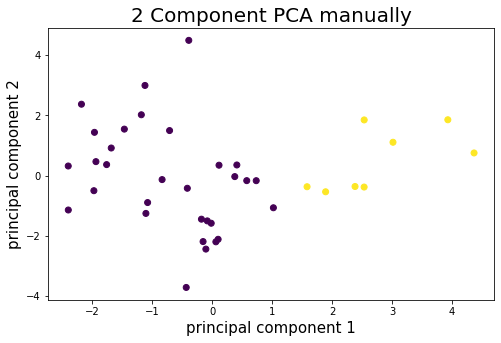

In [72]:
# [9]
# aus ndarray einen DataFrame erzeugen 
principalDf = pd.DataFrame(data = Y , columns = ['principal component 1', 'principal component 2'])

print(principalDf.shape)

#print(principalDf)

# eine dritte Spalte mit den Werten der Flächennutzung ergänzen
Z = pd.DataFrame(data,columns = ['Flaechennutzung'])
finalDf = pd.concat([principalDf, Z], axis = 1) 

print(finalDf)

# hier Abbildung mit matplotlib erzeugen

import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(8, 5))
ax = fig.add_subplot(1,1,1) 
ax.scatter(finalDf['principal component 1'], 
           finalDf['principal component 2'], 
           c = finalDf['Flaechennutzung']*30)
ax.set_xlabel('principal component 1', fontsize = 15) 
ax.set_ylabel('principal component 2', fontsize = 15)
ax.set_title('2 Component PCA manually', fontsize = 20) 
plt.show()



### Hauptkomponentenanalyse mit sklearn

Das Python Package `sklearn` enthält viele nützliche Funtkionen für statistische Analysen und maschinelles Lernen. Darunter auch eine Funktion für Hauptkomponentenanalyse `sklearn.decomposition.PCA()`. Definiert dafür zuerst ein Objekt das die genaue Methode beschreibt (z. B. als "model") mit Hilfe der Funktion `sklearn.decomposition.PCA()`. Definiert als Input wie viele Hauptkomponenten (`n_components=2`) Ihr ausgegeben haben möchtet. 

Dann könnt Ihr den reduzierten Datensatz berechnen, indem Ihr auf diese Methode das Attribut `.fit_transform()` anwendet, mit dem ursprünglichen Datensatz als Input. 


In [110]:
# [10]
# Package einladen
from sklearn.decomposition import PCA
# Model-Objekt erzeugen
model = PCA(n_components=15)
# Fit-Funktion auf Model-Objekt anwenden 
data_reduced = model.fit_transform(data_std)

Für die Bewertung der Aussagekraft einer Hauptkomponentenanalyse ist es wichtig zu wissen, wie viel der ursprünglich Varianz (und damit der Informationen) in dem neuen transformierten Datensatz enthalten ist. Für die einzelnen Komponenten könnt Ihr das ausrechnen, indem Ihr das Attribut `.explained_variance_ratio_` auf Euer PCA Objekt anwendet. 

Berechnet außerdem die Summe der Varianzen (z. B. mit der Funktion `sum()` ), und lasst Euch schließlich die Werte beider Variablen anzeigen. 

Wie würdet Ihr die Werte einordnen und die Aussagekraft bewerten?

In [111]:
# [11] 
# einzelne Varianzen berechnen 
var_exp = model.explained_variance_ratio_
# Summe der Varianzen bilden
var_tot = sum(model.explained_variance_ratio_)
# beide Variablen ausgeben lassen
print (var_exp)
print(var_tot)

[0.19380804 0.17534104 0.13723381 0.10807836 0.09093575 0.07219663
 0.05911094 0.04637233 0.04183171 0.02841123 0.01747433 0.01565598
 0.0076278  0.00491046 0.0010116 ]
1.0000000000000002


Nun stellt auch die Ergebnisse der PCA mit `sklearn` analog zu oben Score Plot graphisch dar, und vergleicht die beiden Ergebnisse.

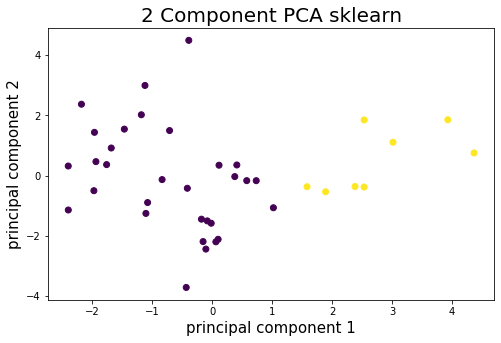

In [143]:
# [12] hier Code eingeben

pcs = np.column_stack((data_reduced[:,0], data_reduced[:,1]))

principalDf2 = pd.DataFrame(data = pcs, columns = ['principal component 1', 'principal component 2'])
finalDf2 = pd.concat([principalDf2,pd.DataFrame(data,columns = ['Flaechennutzung'])], axis = 1) 

fig = plt.figure(1, figsize=(8, 5))
ax = fig.add_subplot(1,1,1) 
ax.scatter(finalDf2['principal component 1'], 
           finalDf2['principal component 2'], 
           c = finalDf2['Flaechennutzung'])
ax.set_xlabel('principal component 1', fontsize = 15) 
ax.set_ylabel('principal component 2', fontsize = 15)
ax.set_title('2 Component PCA sklearn', fontsize = 20) 
plt.show()

Wenn Ihr alles richtig gemacht habt, sollten die beiden Abbildung das gleiche Bild zeigen (u.U. gespiegelt oder rotiert, also mit einem Vorzeichenwechsel auf einer oder beiden Achsen). 



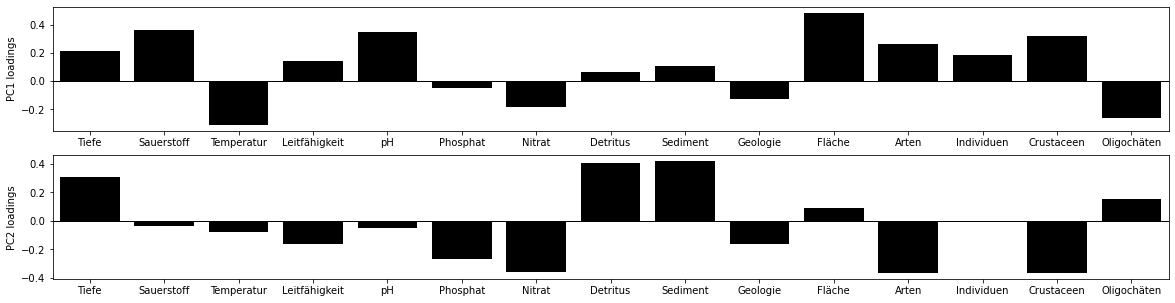

In [123]:
# [13] Loading Plot

fig = plt.figure(1, figsize=(20, 5))
ax1 = plt.subplot(211)

bars = ['Tiefe', 'Sauerstoff', 'Temperatur', 'Leitfähigkeit', 'pH', 'Phosphat', 'Nitrat', 'Detritus', 'Sediment', 'Geologie', 'Fläche', 'Arten', 'Individuen', 'Crustaceen', 'Oligochäten']

ax1.bar(bars, model.components_[0], color='k')
ax1.hlines(0, -1, 15, colors='k', lw=1)
ax1.set_ylabel('PC1 loadings')
ax1.set_xlim(-0.5, 14.5)

ax2 = plt.subplot(212)
ax2.bar(bars, model.components_[1], color='k')
ax2.hlines(0, -1, 15, colors='k', lw=1)
ax2.set_ylabel('PC2 loadings')
ax2.set_xlim(-0.5, 14.5)


plt.show()


... Scree Plot mit relativen Varianzen, einzeln und kumulativ

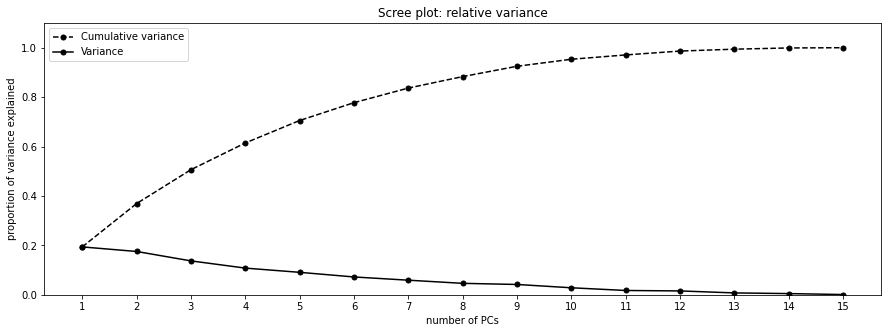

In [125]:
# [14] Scree Plot

fig = plt.figure(1, figsize=(15, 5))
ax = plt.subplot(111)

#plt.plot(np.arange(1,data_std.shape[1]+1), model.explained_variance_.cumsum(), \
#          marker='o', markersize=5, linestyle = 'dashed', color='k', label='Cumulative variance')
#plt.plot(np.arange(1,data_std.shape[1]+1), model.explained_variance_, \
#          marker='o', markersize=5, color='k', label='Variance')
#plt.xlabel('number of PCs')
#plt.ylabel('variance explained')
#plt.xticks(np.arange(1,data_std.shape[1]+1,1))
#plt.legend()
#plt.title('Scree plot: absolute variance')

plt.plot(np.arange(1,data_std.shape[1]+1), model.explained_variance_ratio_.cumsum(), \
          marker='o', markersize=5, linestyle = 'dashed', color='k', label='Cumulative variance')
plt.plot(np.arange(1,data_std.shape[1]+1), model.explained_variance_ratio_, \
          marker='o', markersize=5, color='k', label='Variance')
plt.xlabel('number of PCs')
plt.ylabel('proportion of variance explained')
plt.xticks(np.arange(1,data_std.shape[1]+1,1))
plt.ylim(0,1.1)
plt.legend()
plt.title('Scree plot: relative variance')



plt.show()


## Ende

### Referenzen: 

Koch et al. (2020), Groundwater fauna in an urban area: natural or affected? https://hess.copernicus.org/preprints/hess-2020-151/hess-2020-151.pdf

Lever et al. (2017) Principal component analysis, Nature Methods 14(7), 641-642

https://towardsdatascience.com/a-complete-guide-to-principal-component-analysis-pca-in-machine-learning-664f34fc3e5a